In [197]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import binarize

## Dataset 1:   Iris Flower Classification

In [113]:
# We will use the Iris dataset to train our models
iris = load_iris()

X = iris.data
y = iris.target

### Training Different Models (Logistic Regression & KNN)

In [20]:
# K-Nearest Neighbors Model (K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred_k1 = knn.predict(X)

In [19]:
# K-Nearest Neighbors Model (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred_k5 = knn.predict(X)

In [56]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred_logreg = logreg.predict(X)

### Evaluation Procedure #1: Train & Test on Entire Dataset

In [21]:
# Accuracy of Logistic Regression Model
print(metrics.accuracy_score(y, y_pred_logreg))

# Accuracy of KNN (K=5) Model
print(metrics.accuracy_score(y, y_pred_k5))

# Accuracy of KNN (K=1) Model
print(metrics.accuracy_score(y, y_pred_k1))

0.96
0.9666666666666667
1.0


### Evaluation Procedure #2: Train/Test Split

In [67]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

# Train the model on the training set with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [62]:
# Repeat for KNN (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [63]:
# Repeat for KNN (K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.95


### How to locate a better value for K?

In [64]:
# try K=1 through K=25 and record testing accuracy
scores = []
for K in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

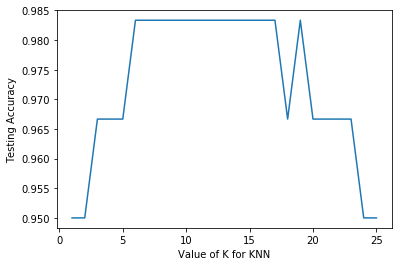

In [65]:
# Plot the different values of K and accuracy for each
%matplotlib inline

plt.plot(range(1, 26), scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

## K-fold Cross-validation
* Used to select the best tuning parameters to prevent overfitting/underfitting
* Better than train_test_split for finding accuracy of a model
### Goal: find an optimal value of K for KNN

In [73]:
# 10-fold CV with K=5 for KNN (example)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


Text(0, 0.5, 'Cross-Validation Accuracy')

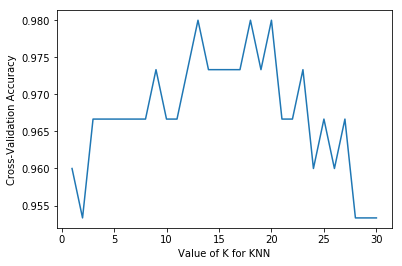

In [76]:
# Search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for K in k_range:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    

# Visualize the value for K versus the CV accuracy
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

### CV example: model selection

In [79]:
# 10-fold CV with the best KNN model (K=20)
knn = KNeighborsClassifier(n_neighbors=20)
print( cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean() )

0.9800000000000001


In [80]:
# 10-fold CV with logistic regression
logreg = LogisticRegression()
print( cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean() )

0.9533333333333334


### More efficient parameter tuning using GridSearchCV
#### Allows you to define a grid of parameters that will be searched using K-fold CV

In [102]:
k_range = range(1, 31)

# map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X, y)

# view the accuracy scores
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [97]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


### Searching multiple parameters simultaneously

In [105]:
# define the param values that should be searched (using KNN for this example)
weight_options = ['uniform', 'distance']

# create param grid: map the param names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)

# create and fit the grid
grid2 = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid2.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [106]:
# view the results
pd.DataFrame(grid2.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


,mean_test_score,std_test_score,params
0,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.960000,0.053333,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.953333,0.052068,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.960000,0.053333,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.966667,0.044721,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.966667,0.044721,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.966667,0.044721,"{'n_neighbors': 5, 'weights': 'distance'}"


In [107]:
# examine the best model
print(grid2.best_score_)
print(grid2.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


### Using the best parameters to make predictions

In [111]:
# Method 1:
# train your model using all data and the best parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
knn.predict([[3,5,4,2]])

array([1])

In [112]:
# Method 2:
# GridSearchCV automatically refits the best model using all the data
grid.predict([[3,5,4,2]])

array([1])

### Reducing computational expense using RandomizedSearchCV
* Searching many different parameters at once can be computationally expensive
* RandomizedSearchCV searches a subset of the parameters, which you can control

In [129]:
# specify parameter distributions rather than grid
param_dist = dict(n_neighbors=k_range, weights=weight_options)

# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)

# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


## Model Evaluation Metrics
* #### Regression problems: MAE, MSE, RMSE
* #### Classification problems: Classification Accuracy

## Dataset 2: Diabetes Diagnosis

In [134]:
# read the new data into a Pandas dataframe
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv(url, header=None, names=col_names)

In [138]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = df[feature_cols]
y = df.label

# split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# train a logistic regression model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [140]:
# make class predictions with the testing set
y_pred_class = logreg.predict(X_test)

# calculate accuracy (percentage of correct prediction compared to y_test)
print(metrics.accuracy_score(y_test, y_pred_class))


0.6927083333333334


### Null accuracy 
- The accuracy achieved by always predicting the most frequent class

In [190]:
# class distribution of the testing set
y_test.value_counts()

# calculate the percentage of ones
y_test.mean()

# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

- **Classification Accuracy** is the easiest classification metric to understand
- Although, it doesn't tell you the **underlying distribution** of response values
- It doesn't tell you what **types of errors** the classifier is making

## Confusion Matrix
#### Table that describes the performance of a classification model

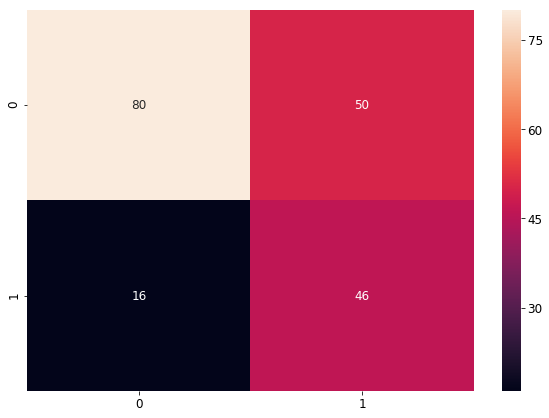

In [199]:
# first argument is true values, second argument is predicted values
confusion = metrics.confusion_matrix(y_test, y_pred_class)

# visualize confusion matrix
df_cm = pd.DataFrame(confusion, index = [i for i in range(0, 2)], columns = [i for i in range(0, 2)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

![confusion matrix](Extras/09_confusion_matrix_1.png)

**Basic Terminology**
- **True Positive (TP):** we correctly predicted they do have diabetes
- **True Negative (TN):** we correctly predicted they don't have diabetes
- **True Positive (FP):** we incorrectly predicted they do have diabetes (Type 1 error)
- **True Positive (FN):** we incorrectly predicted they don't have diabetes (Type 2 error)

In [153]:
# print the first 25 true and predicted response values
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

# slice the confusion matrix into four pieces
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


![confusion_matrix_2](Extras/09_confusion_matrix_2.png)

#### Classification accuracy & error

In [157]:
# How often is the classifier correct?
# (both of these lines do the same thing)
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

# How often is the classifier incorrect?
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334
0.30729166666666663


#### Other metrics

In [158]:
## Sensitivity: when the actual value is positive, how often is the prediction correct?
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))


0.24193548387096775
0.24193548387096775


In [159]:
## Specificity: when the actual value is negative, how often is the prediction correct?
print(TN / float(TN + FP))


0.9076923076923077


In [160]:
## False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print(FP / float(TN + FP))


0.09230769230769231


In [161]:
## Precision: When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))


0.5555555555555556
0.5555555555555556


**Examples of choosing metrics:**
* **Spam Filter** (positive class is "spam"): Optimize for precision or specificity because false negatives (spam goes into inbox) are more acceptable than false positives (non-spam gone into spam folder).
* **Fraudulent transaction detector** (positive class is "fraud"): Optimize for sensitivity because false positives (normal transactions flagged as fraud) are more acceptable than false negatives (fraud transactions that aren't detected).

### Adjusting classification threshold

In [195]:
# first 10 predicted responses
logreg.predict(X_test)[0:10]

# first 10 predicted probabilities for each class
logreg.predict_proba(X_test)[0:10, :]

# all predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

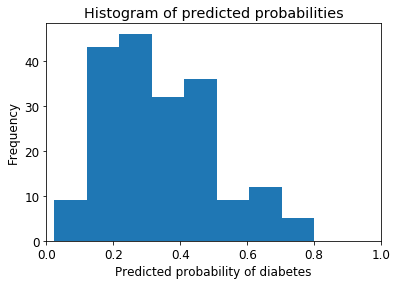

In [172]:
%matplotlib inline
plt.rcParams['font.size'] = 12

# plot a histogram of predicted probabilities for class 1
plt.hist(y_pred_proba, bins=8)
plt.xlim(0, 1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probability of diabetes")
plt.ylabel("Frequency")

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

In [185]:
# predict diabetes if the predicted probability is greater than 0.3
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [186]:
# first 10 predicted probabilities
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [187]:
# first 10 predicted probabilities with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [188]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions


- Threshold can be **adjusted** to increase ***sensitivity*** or ***specificity***


- Sensitivity and specificity have an **inverse relationship**